<a href="https://colab.research.google.com/github/zeze1004/AI/blob/master/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
%matplotlib inline
import numpy as np
import pandas as pd
import csv
import torch
import torch.optim as optim
import csv
import torch.nn as nn

wine_path = "https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch4/tabular-wine/winequality-white.csv"
#wine_path = "../data/p1ch4/tabular-wine/winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path, dtype = np.float32, delimiter = ";", skiprows = 1)
wine_data = pd.read_csv(wine_path, delimiter=';')
wineq_numpy.shape

wineq = torch.from_numpy(wineq_numpy)
wineq.shape # columns and rows
wineq.dtype

wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [9]:
# quality 제거
data = wineq[:, :-1] 
data

tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
        [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
        [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
        ...,
        [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
        [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
        [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]])

In [11]:
# quality data를 target으로 설정
target = wineq[:, -1].long()
target

tensor([6, 6, 6,  ..., 6, 7, 6])

In [12]:
# target을 onehot vector로 만듦
onehot_target = torch.zeros(target.shape[0],10)
onehot_target.scatter_(1, target.unsqueeze(1),1.0)
target = onehot_target
target

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [13]:
n_samples = data.shape[0]
n_samples
# validation data 
n_val = int(0.2 * n_samples)

In [16]:
shuffled_indices = torch.randperm(n_samples)
shuffled_indices

tensor([ 477, 3567, 4600,  ..., 4366,  657, 1734])

In [60]:
# training data, validation data 분리
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

target_train = target[train_indices]
data_train = data[train_indices]
target_val = target[val_indices]
data_val = data[val_indices]


In [83]:
loss_val_data = [] # validation data의 loss 값을 저장하는 리스트
loss_train_data = [] # train data의 loss 값을 저장하는 리스트
# 트레이닝 루프
import torch.nn as nn
def training_loop(n_epochs, optimizer, model, loss_fn, data_train, data_val,
                  target_train, target_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(data_train) # <1>
        loss_train = loss_fn(t_p_train, target_train)
        t_p_val = model(data_val) 
        loss_val = loss_fn(t_p_val, target_val)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        loss_val_data.append(loss_val.item())
        loss_train_data.append(loss_train.item())
        if epoch == 1 or epoch % 500 == 0:
          print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

# roop
linear_model = nn.Linear(11, 10)
learning_rate = 1e-6
optimizer = optim.SGD(linear_model.parameters(), lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), 
    data_train = data_train,
    data_val = data_val, 
    target_train = target_train,
    target_val = target_val)


Epoch 1, Training loss 700.0565, Validation loss 689.6561
Epoch 500, Training loss 10.1204, Validation loss 9.8985
Epoch 1000, Training loss 2.5393, Validation loss 2.4014
Epoch 1500, Training loss 2.4079, Validation loss 2.2729
Epoch 2000, Training loss 2.3587, Validation loss 2.2285
Epoch 2500, Training loss 2.3118, Validation loss 2.1865
Epoch 3000, Training loss 2.2665, Validation loss 2.1460
Epoch 3500, Training loss 2.2225, Validation loss 2.1067
Epoch 4000, Training loss 2.1800, Validation loss 2.0686
Epoch 4500, Training loss 2.1387, Validation loss 2.0317
Epoch 5000, Training loss 2.0987, Validation loss 1.9959


In [85]:
print(loss_train_data)

[700.0564575195312, 693.77001953125, 687.5401611328125, 681.3663940429688, 675.2483520507812, 669.1854858398438, 663.1771240234375, 657.2229614257812, 651.3225708007812, 645.4752807617188, 639.6806640625, 633.9382934570312, 628.2476806640625, 622.6083374023438, 617.0198364257812, 611.4817504882812, 605.9935913085938, 600.5547485351562, 595.1650390625, 589.823974609375, 584.5308837890625, 579.28564453125, 574.0875854492188, 568.9363403320312, 563.8316650390625, 558.7728271484375, 553.7597045898438, 548.7916259765625, 543.868408203125, 538.9896240234375, 534.1547241210938, 529.363525390625, 524.6152954101562, 519.9100341796875, 515.2471313476562, 510.626220703125, 506.04693603515625, 501.5090026855469, 497.0119323730469, 492.5553894042969, 488.1390075683594, 483.7624816894531, 479.42535400390625, 475.1272888183594, 470.86798095703125, 466.6470947265625, 462.4642028808594, 458.3190002441406, 454.2112121582031, 450.14044189453125, 446.1063537597656, 442.1086120605469, 438.1468811035156, 43

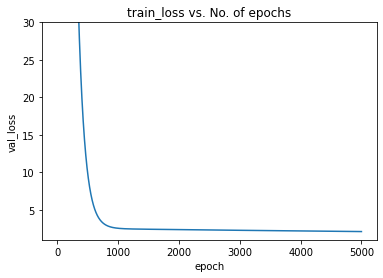

In [91]:
# epoch에 따른 train data training loss 그래프
from matplotlib import pyplot as plt
import numpy as np
plt.title('train_loss vs. No. of epochs');
x = range(n_epochs)
y = loss_train_data
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.ylim(1,30) # t축 범위
plt.plot(x,y)
plt.show()

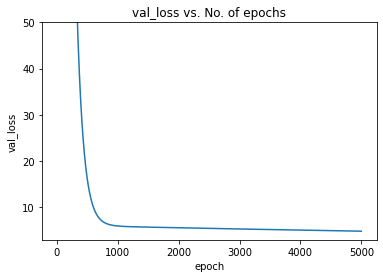

In [81]:
# epoch에 따른 validation data training loss 그래프
from matplotlib import pyplot as plt
import numpy as np
plt.title('val_loss vs. No. of epochs');
x = range(n_epochs)
y = loss_val_data
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.ylim(1,30) # t축 범위
plt.plot(x,y)
plt.show()